Вам наданий повний список найбільш високооплачуваних спортсменів у світі з моменту першого списку, опублікованого Forbes у 1990 році, до 2019 року включно (Richest_Atheletes_Forbes.csv). У 2002 році Forbes змінили звітний період з повного календарного року на червень-червень, і, отже, немає жодних записів для 2001.
Файл містить змінні:
•	S.NO: серійний номер
•	Name: Ім’я
•	Nationality: Національність
•	Current Rank: Поточна позиція у списку
•	Previous Year Rank: Позиція за попередній рік
•	Sport: Спорт
•	Year: Рік
•	earnings ($ million): заробіток (мільйон доларів)
Завдання:
1.	Завантажте дані у проект
2.	Зробіть перевірку даних на консистентність та обробіть пропуски, якщо вони є та якщо вони значущі
3.	Зробіть розвідувальний аналіз даних:
a.	побудуйте графік кількісного співвідношення даних по роках;
b.	виділіть найбільш високооплачуваних спортсменів кожного року з 1990 по 2020 рік;
c.	знайдіть спортсмена, який заробляв найбільше максимальну кількість разів


In [18]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [21]:
df = pd.read_csv('Richest_Atheletes_Forbes.csv')
df.columns = ["s_num", "name", "nationality", "curr_rank", "prev_rank", "sport", "year", "income"]
df['sport'] = df['sport'].str.lower()

In [22]:
df

,s_num,name,nationality,curr_rank,prev_rank,sport,year,income
10,11,Evander Holyfield,USA,1,8,boxing,1991,60.5
11,12,Mike Tyson,USA,2,1,boxing,1991,31.5
12,13,Michael Jordan,USA,3,8,basketball,1991,16.0
13,14,George Foreman,USA,4,>30,boxing,1991,14.5
14,15,Ayrton Senna,Brazil,5,4,auto racing,1991,13.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,american football,2020,60.5


In [59]:
df_task_a = df.groupby(["year"])['income'].agg(['sum', 'count'])

In [60]:
df_task_a

,sum,count
year,,
1991,183.5,10
1992,158.7,10
1993,178.3,10
1994,148.9,10
1995,229.1,10
1996,273.1,10
1997,338.1,10
1999,357.5,10
2000,338.5,10


In [48]:
df_task_b = df.groupby(["name"])['income'].agg(['sum']).sort_values('sum', ascending=False)

In [49]:
df_task_b = df_task_b[df_task_b['sum'] > 100].reset_index()

[Text(0, 0, 'Tiger Woods'),
 Text(1, 0, 'LeBron James'),
 Text(2, 0, 'Floyd Mayweather'),
 Text(3, 0, 'Cristiano Ronaldo'),
 Text(4, 0, 'Roger Federer'),
 Text(5, 0, 'Lionel Messi'),
 Text(6, 0, 'Michael Jordan'),
 Text(7, 0, 'Kobe Bryant'),
 Text(8, 0, 'Michael Schumacher'),
 Text(9, 0, 'Phil Mickelson'),
 Text(10, 0, 'David Beckham'),
 Text(11, 0, 'Manny Pacquiao'),
 Text(12, 0, 'Kevin Durant'),
 Text(13, 0, 'Neymar'),
 Text(14, 0, 'Mike Tyson'),
 Text(15, 0, "Shaquille O'Neal"),
 Text(16, 0, 'Stephen Curry'),
 Text(17, 0, 'Oscar De La Hoya'),
 Text(18, 0, 'Evander Holyfield'),
 Text(19, 0, 'Kimi Raikkonen'),
 Text(20, 0, 'Valentino Rossi'),
 Text(21, 0, 'Alex Rodriguez'),
 Text(22, 0, 'Grant Hill'),
 Text(23, 0, 'Matt Ryan'),
 Text(24, 0, 'Andre Agassi'),
 Text(25, 0, "Shaq O'Neal"),
 Text(26, 0, 'Kevin Garnett')]

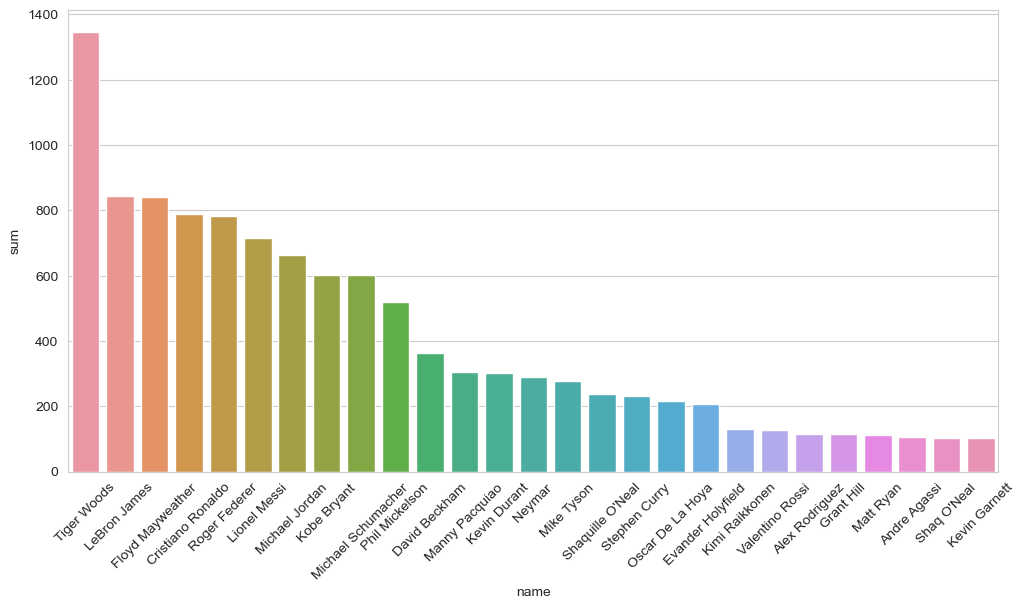

In [50]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=df_task_b, x="name", y="sum")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [55]:
df_task_c = df.groupby(["name"])['income'].agg(['sum','count']).sort_values('count', ascending=False).head(1)

In [56]:
df_task_c

,sum,count
name,,
Tiger Woods,1347.0,18
